# Boundary Value Problems 
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy.integrate.solve_bvp

경계값 문제는 일반적으로 초기값 문제보다 조금 까다롭니다. 경계값 문제를 해결하는 가장 간단한 방법은 슈팅 방법(shooting method) 등의 근(root)을 구하는 방법을 이용하는 것이다. 슈팅 방법 혹은 뉴튼 방법, 시컨트(Secnat) 방법 등의 근을 구하는 방법을 이용하면 경계값 문제(boundary value problems)를 초기값 문제를 반복해서 푸는 것으로 바꾸어 해결할 수 있다. 이 과정에서는 자세한 이론은 다루지 않고 solve_bvp함수를 사용하여 경계값 문제를 해결하는 방법을 소개하기로 한다.

넓이가 $L$인 무한히 깊은 퍼텐셜에 있는 입자를 생각하자. 그러면 슈뢰딩거 방정식은 다음과 같으며
$$ -\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} = E\psi,$$
경계조건은 다음으로 주어진다.
$$ \psi(0)=\psi(L)=0.$$
위의 이차 미분방정식을 두 개의 일차 미분방정식으로 나누면
$$ \frac{d \psi}{dx} = y, \\
\frac{dy}{dx}= -k^2 \psi.$$
여기에서 $k=\frac{\sqrt{2mE}}{\hbar}$이다. 문제를 간단히 하기 위해 $L=\pi$인 상자를 생각하자.

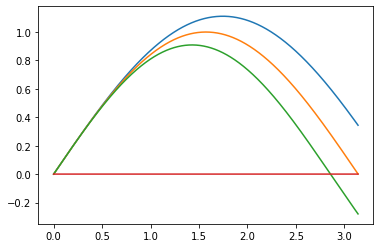

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

state0 = [0.0, 1.0] 

x = np.arange(0.0, np.pi, 0.001)
def f(state, t):
    psi, y = state 
    return y, -psi*k**2 # derivatives

for k in np.arange(0.9,1.1,0.1):
    states = odeint(f, state0, x)
    plt.plot(x,states[:,0])
plt.plot(x,[0 for i in x])

즉 $k$값 (혹은 $E$)를 수정하면서 반복적으로 미분방정식을 풀어 경계조건을 만족하는 값을 찾으면 된다. 이런 방법을 shooting 방법이라고 하며 조건을 만족하는 $k$값을 찾기 위해 binary search 등의 방법을 이용하여 $k \rightarrow k+\Delta k$를 하면 된다. 구체적은 방법에 대한 소개는 생략한다.  

이제 scipy.integrate.solve_bvp을 이용하여 같은 문제를 해결해보자. 보기 쉽게 변수를 다음처럼 지정하자.
$$ \frac{d y_0}{dx} = y_1, \\
\frac{dy_1}{dx}= -k^2 y_0.$$


In [163]:
# 우선 다음처럼 scipy.integrate.solve_bvp 함수를 불러오자.
from scipy.integrate import solve_bvp

# setup mesh
x=np.linspace(0,np.pi,10)
y=np.zeros((2,x.size)) # array with 2 x [size of x]
# use np.vstack y=[[y0],[y1]]
def f(x, y, p):
    k=p[0]
    return np.vstack((y[1], -k**2 * y[0])) # derivatives
# boundary conditions
def bc(ya,yb,p): # a<x<b
    k=p[0]
    return np.array([ya[0],yb[0],ya[1]-1]) # meaning that y(0)=0, y(L)=0, y'(0)=1
y[0,5]=10

sol = solve_bvp(f,bc,x,y,p=[0.4])
sol.p[0]

1.0000184399918766

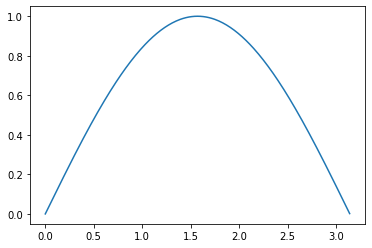

In [164]:
xp=np.arange(0,np.pi,0.01)
plt.plot(xp,sol.sol(xp)[0])

* 편미분 방정식에서 BVP은 매우 중요하며(예컨데 라플라스 방정식, 3차원 슈뢰딩거 방정식 등) 이는 전산물리학2에서 다루기로 하자.